In [3]:
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display


from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from sklearn.cluster import DBSCAN

In [5]:
plt.rcParams['figure.figsize'] = [6,4]
plt.rcParams['figure.dpi'] = 200
plt.rcParams["axes.grid"] = False

In [6]:
%store -r Scotland_2021

In [7]:
Scotland_2021

,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
29,29,RD Berrington (SCOT),6,6,1,184,97,36.80,232,79.31,...,49,1,1/23,49.00,4.08,72.0,0,0,1,0
42,42,DE Budge (SCOT),6,5,3,102,40*,51.00,134,76.11,...,19,0,-,-,3.80,-,0,0,5,0
56,56,KJ Coetzer (SCOT),6,6,0,195,81,32.50,280,69.64,...,-,-,-,-,-,-,-,-,0,0
61,61,MH Cross (SCOT),6,6,0,123,70,20.50,180,68.33,...,-,-,-,-,-,-,-,-,11,0
82,82,AC Evans (SCOT),5,-,-,-,-,-,-,-,...,145,11,5/43,13.18,4.18,18.9,0,1,1,0
102,102,Hamza Tahir (SCOT),5,-,-,-,-,-,-,-,...,156,5,3/36,31.20,4.58,40.8,0,0,0,0
150,150,MA Leask (SCOT),4,2,1,51,51*,51.00,35,145.71,...,60,5,3/19,12.00,3.15,22.8,0,0,0,0
161,161,CS MacLeod (SCOT),6,6,0,115,45,19.16,240,47.91,...,9,1,1/4,9.00,1.80,30.0,0,0,2,0
168,168,GT Main (SCOT),4,1,1,13,13*,-,11,118.18,...,137,7,3/33,19.57,4.41,26.5,0,0,2,0
206,206,HG Munsey (SCOT),6,6,3,230,79*,76.66,281,81.85,...,-,-,-,-,-,-,-,-,1,0


In [8]:
Scotland_2021=Scotland_2021.reset_index()

In [9]:
Scotland_2021

,index,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,29,29,RD Berrington (SCOT),6,6,1,184,97,36.80,232,...,49,1,1/23,49.00,4.08,72.0,0,0,1,0
1,42,42,DE Budge (SCOT),6,5,3,102,40*,51.00,134,...,19,0,-,-,3.80,-,0,0,5,0
2,56,56,KJ Coetzer (SCOT),6,6,0,195,81,32.50,280,...,-,-,-,-,-,-,-,-,0,0
3,61,61,MH Cross (SCOT),6,6,0,123,70,20.50,180,...,-,-,-,-,-,-,-,-,11,0
4,82,82,AC Evans (SCOT),5,-,-,-,-,-,-,...,145,11,5/43,13.18,4.18,18.9,0,1,1,0
5,102,102,Hamza Tahir (SCOT),5,-,-,-,-,-,-,...,156,5,3/36,31.20,4.58,40.8,0,0,0,0
6,150,150,MA Leask (SCOT),4,2,1,51,51*,51.00,35,...,60,5,3/19,12.00,3.15,22.8,0,0,0,0
7,161,161,CS MacLeod (SCOT),6,6,0,115,45,19.16,240,...,9,1,1/4,9.00,1.80,30.0,0,0,2,0
8,168,168,GT Main (SCOT),4,1,1,13,13*,-,11,...,137,7,3/33,19.57,4.41,26.5,0,0,2,0
9,206,206,HG Munsey (SCOT),6,6,3,230,79*,76.66,281,...,-,-,-,-,-,-,-,-,1,0


In [10]:
Scotland_2021.drop(['index','Unnamed: 0_x'],inplace=True,axis=1)

In [11]:
Scotland_2021

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,RD Berrington (SCOT),6,6,1,184,97,36.80,232,79.31,0,...,49,1,1/23,49.00,4.08,72.0,0,0,1,0
1,DE Budge (SCOT),6,5,3,102,40*,51.00,134,76.11,0,...,19,0,-,-,3.80,-,0,0,5,0
2,KJ Coetzer (SCOT),6,6,0,195,81,32.50,280,69.64,0,...,-,-,-,-,-,-,-,-,0,0
3,MH Cross (SCOT),6,6,0,123,70,20.50,180,68.33,0,...,-,-,-,-,-,-,-,-,11,0
4,AC Evans (SCOT),5,-,-,-,-,-,-,-,-,...,145,11,5/43,13.18,4.18,18.9,0,1,1,0
5,Hamza Tahir (SCOT),5,-,-,-,-,-,-,-,-,...,156,5,3/36,31.20,4.58,40.8,0,0,0,0
6,MA Leask (SCOT),4,2,1,51,51*,51.00,35,145.71,0,...,60,5,3/19,12.00,3.15,22.8,0,0,0,0
7,CS MacLeod (SCOT),6,6,0,115,45,19.16,240,47.91,0,...,9,1,1/4,9.00,1.80,30.0,0,0,2,0
8,GT Main (SCOT),4,1,1,13,13*,-,11,118.18,0,...,137,7,3/33,19.57,4.41,26.5,0,0,2,0
9,HG Munsey (SCOT),6,6,3,230,79*,76.66,281,81.85,0,...,-,-,-,-,-,-,-,-,1,0


In [12]:
Scotland_2021_players =Scotland_2021.copy()

In [13]:
Scotland_2021_players.drop('Player',axis=1,inplace=True)

In [14]:
Scotland_2021_players.HS=Scotland_2021_players.HS.str.extract('(\d+)')
Scotland_2021_players['HS'].fillna(value=0, inplace=True)


In [15]:
Scotland_2021_players

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,6,6,1,184,97,36.80,232,79.31,0,1,...,49,1,1/23,49.00,4.08,72.0,0,0,1,0
1,6,5,3,102,40,51.00,134,76.11,0,0,...,19,0,-,-,3.80,-,0,0,5,0
2,6,6,0,195,81,32.50,280,69.64,0,2,...,-,-,-,-,-,-,-,-,0,0
3,6,6,0,123,70,20.50,180,68.33,0,1,...,-,-,-,-,-,-,-,-,11,0
4,5,-,-,-,0,-,-,-,-,-,...,145,11,5/43,13.18,4.18,18.9,0,1,1,0
5,5,-,-,-,0,-,-,-,-,-,...,156,5,3/36,31.20,4.58,40.8,0,0,0,0
6,4,2,1,51,51,51.00,35,145.71,0,1,...,60,5,3/19,12.00,3.15,22.8,0,0,0,0
7,6,6,0,115,45,19.16,240,47.91,0,0,...,9,1,1/4,9.00,1.80,30.0,0,0,2,0
8,4,1,1,13,13,-,11,118.18,0,0,...,137,7,3/33,19.57,4.41,26.5,0,0,2,0
9,6,6,3,230,79,76.66,281,81.85,0,2,...,-,-,-,-,-,-,-,-,1,0


In [16]:
Scotland_2021_players.replace("-",0,inplace=True)

In [17]:
Scotland_2021_players.drop('BBI',axis=1,inplace=True)

In [18]:
scaler = StandardScaler()

Scotland_2021_players_scaled = pd.DataFrame(scaler.fit_transform(Scotland_2021_players),columns=Scotland_2021_players.columns)
Scotland_2021_players_scaled.shape
Scotland_2021_players_scaled.head()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,0.752618,1.179522,0.277350,1.371986,1.818796,0.572868,1.157849,0.432124,0.0,0.68313,...,-0.650945,-0.341559,-0.616670,1.698072,0.291338,1.571312,0.0,-0.277350,-0.274914,0.0
1,0.752618,0.795491,2.218801,0.336457,0.117273,1.186544,0.274329,0.359756,0.0,-0.68313,...,-0.650945,-0.807322,-0.936425,-1.120339,0.176790,-1.086209,0.0,-0.277350,1.124649,0.0
2,0.752618,1.179522,-0.693375,1.510898,1.341176,0.387036,1.590593,0.213437,0.0,2.04939,...,-0.650945,-1.102305,-0.936425,-1.120339,-1.377792,-1.086209,0.0,-0.277350,-0.624805,0.0
3,0.752618,1.179522,-0.693375,0.601653,1.012812,-0.131564,0.689042,0.183811,0.0,0.68313,...,-0.650945,-1.102305,-0.936425,-1.120339,-1.377792,-1.086209,0.0,-0.277350,3.223993,0.0
4,0.167248,-1.124660,-0.693375,-0.951640,-1.076779,-1.017505,-0.933749,-1.361470,0.0,-0.68313,...,0.260378,1.148881,2.580877,-0.362244,0.332248,-0.388610,0.0,3.605551,-0.274914,0.0


In [19]:
Scotland_2021_players_scaled.describe()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
count,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01,14.0,1.400000e+01,...,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01,14.0,1.400000e+01,1.400000e+01,14.0
mean,-7.930164e-18,1.110223e-16,-2.379049e-17,-5.551115e-17,1.506731e-16,-5.749369e-17,1.030921e-16,-5.551115e-17,0.0,-4.758099e-17,...,-6.344132e-17,3.172066e-17,4.609408e-17,1.427430e-16,-4.956353e-18,3.172066e-17,0.0,-3.172066e-17,-3.965082e-18,0.0
std,1.037749e+00,1.037749e+00,1.037749e+00,1.037749e+00,1.037749e+00,1.037749e+00,1.037749e+00,1.037749e+00,0.0,1.037749e+00,...,1.037749e+00,1.037749e+00,1.037749e+00,1.037749e+00,1.037749e+00,1.037749e+00,0.0,1.037749e+00,1.037749e+00,0.0
min,-2.174229e+00,-1.124660e+00,-6.933752e-01,-9.516403e-01,-1.076779e+00,-1.017505e+00,-9.337490e-01,-1.361470e+00,0.0,-6.831301e-01,...,-6.509446e-01,-1.102305e+00,-9.364246e-01,-1.120339e+00,-1.377792e+00,-1.086209e+00,0.0,-2.773501e-01,-6.248048e-01,0.0
25%,-4.181210e-01,-1.028653e+00,-6.933752e-01,-9.105980e-01,-9.797620e-01,-1.017505e+00,-9.089563e-01,-1.090599e+00,0.0,-6.831301e-01,...,-6.509446e-01,-9.237622e-01,-8.564859e-01,-9.909221e-01,-5.984555e-01,-9.201139e-01,0.0,-2.773501e-01,-6.248048e-01,0.0
50%,4.599331e-01,-3.565996e-01,-6.933752e-01,-4.528184e-01,-2.558682e-01,-1.605190e-01,-5.911597e-01,1.986241e-01,0.0,-6.831301e-01,...,-4.231140e-01,-2.561694e-01,-2.969151e-01,-1.784720e-01,6.019620e-02,-1.763771e-01,0.0,-2.773501e-01,-2.749141e-01,0.0
75%,7.526178e-01,1.179522e+00,2.773501e-01,5.763963e-01,8.710180e-01,5.264097e-01,1.040647e+00,4.752053e-01,0.0,6.831301e-01,...,1.464625e-01,1.117830e+00,5.824104e-01,6.042123e-01,4.028178e-01,3.846550e-01,0.0,-2.773501e-01,-1.249610e-02,0.0
max,7.526178e-01,1.179522e+00,2.218801e+00,1.952892e+00,1.818796e+00,2.295483e+00,1.599609e+00,1.933758e+00,0.0,2.049390e+00,...,2.994345e+00,1.552542e+00,2.580877e+00,1.736034e+00,2.210019e+00,2.309512e+00,0.0,3.605551e+00,3.223993e+00,0.0


In [20]:
X =  Scotland_2021_players_scaled.iloc[:,:].values

In [21]:
X

array([[ 0.75261781,  1.17952178,  0.2773501 ,  1.37198563,  1.8187964 ,
         0.57286763,  1.15784871,  0.43212379,  0.        ,  0.68313005,
        -0.52223297,  0.40124003,  2.0684991 , -1.29469717,  0.75261781,
         0.47468504, -0.29719545, -0.65094455, -0.34155914, -0.61666984,
         1.69807212,  0.29133793,  1.57131192,  0.        , -0.2773501 ,
        -0.2749141 ,  0.        ],
       [ 0.75261781,  0.79549143,  2.21880078,  0.3364567 ,  0.11727292,
         1.18654413,  0.27432901,  0.35975586,  0.        , -0.68313005,
        -0.52223297,  0.40124003, -0.59439629, -1.16472757,  0.75261781,
        -0.73360415, -0.77622758, -0.65094455, -0.80732161, -0.93642457,
        -1.12033894,  0.17678982, -1.08620891,  0.        , -0.2773501 ,
         1.1246486 ,  0.        ],
       [ 0.75261781,  1.17952178, -0.69337525,  1.51089805,  1.34117578,
         0.38703601,  1.59059306,  0.21343694,  0.        ,  2.04939015,
        -0.52223297,  2.16669615,  0.7370514 , -1.0247

In [22]:
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

'from sklearn.cross_validation import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)'

In [23]:
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\nsc_y = StandardScaler()\ny_train = sc_y.fit_transform(y_train)'

In [24]:
np.any(np.isnan(Scotland_2021_players_scaled))

False

In [25]:
Scotland_2021_players_scaled

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,0.752618,1.179522,0.277350,1.371986,1.818796,0.572868,1.157849,0.432124,0.0,0.68313,...,-0.650945,-0.341559,-0.616670,1.698072,0.291338,1.571312,0.0,-0.277350,-0.274914,0.0
1,0.752618,0.795491,2.218801,0.336457,0.117273,1.186544,0.274329,0.359756,0.0,-0.68313,...,-0.650945,-0.807322,-0.936425,-1.120339,0.176790,-1.086209,0.0,-0.277350,1.124649,0.0
2,0.752618,1.179522,-0.693375,1.510898,1.341176,0.387036,1.590593,0.213437,0.0,2.04939,...,-0.650945,-1.102305,-0.936425,-1.120339,-1.377792,-1.086209,0.0,-0.277350,-0.624805,0.0
3,0.752618,1.179522,-0.693375,0.601653,1.012812,-0.131564,0.689042,0.183811,0.0,0.68313,...,-0.650945,-1.102305,-0.936425,-1.120339,-1.377792,-1.086209,0.0,-0.277350,3.223993,0.0
4,0.167248,-1.124660,-0.693375,-0.951640,-1.076779,-1.017505,-0.933749,-1.361470,0.0,-0.68313,...,0.260378,1.148881,2.580877,-0.362244,0.332248,-0.388610,0.0,3.605551,-0.274914,0.0
5,0.167248,-1.124660,-0.693375,-0.951640,-1.076779,-1.017505,-0.933749,-1.361470,0.0,-0.68313,...,-0.195283,1.319660,0.662349,0.674241,0.495888,0.419720,0.0,-0.277350,-0.624805,0.0
6,-0.418121,-0.356600,0.277350,-0.307592,0.445637,1.186544,-0.618206,1.933758,0.0,0.68313,...,0.716039,-0.170780,0.662349,-0.430116,-0.089125,-0.244661,0.0,-0.277350,-0.624805,0.0
7,0.752618,1.179522,-0.693375,0.500626,0.266529,-0.189474,1.229973,-0.277987,0.0,-0.68313,...,-0.650945,-0.962576,-0.616670,-0.602672,-0.641411,0.021091,0.0,-0.277350,0.074977,0.0
8,-0.418121,-0.740630,0.277350,-0.787471,-0.688712,-1.017505,-0.834578,1.311168,0.0,-0.68313,...,1.171700,1.024677,1.301859,0.005300,0.426341,-0.108094,0.0,-0.277350,0.074977,0.0
9,0.752618,1.179522,2.218801,1.952892,1.281473,2.295483,1.599609,0.489566,0.0,2.04939,...,-0.650945,-1.102305,-0.936425,-1.120339,-1.377792,-1.086209,0.0,-0.277350,-0.274914,0.0


In [26]:
np.all(np.isfinite(Scotland_2021_players_scaled))

True

K:\4th year\my research practical\jupyter\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


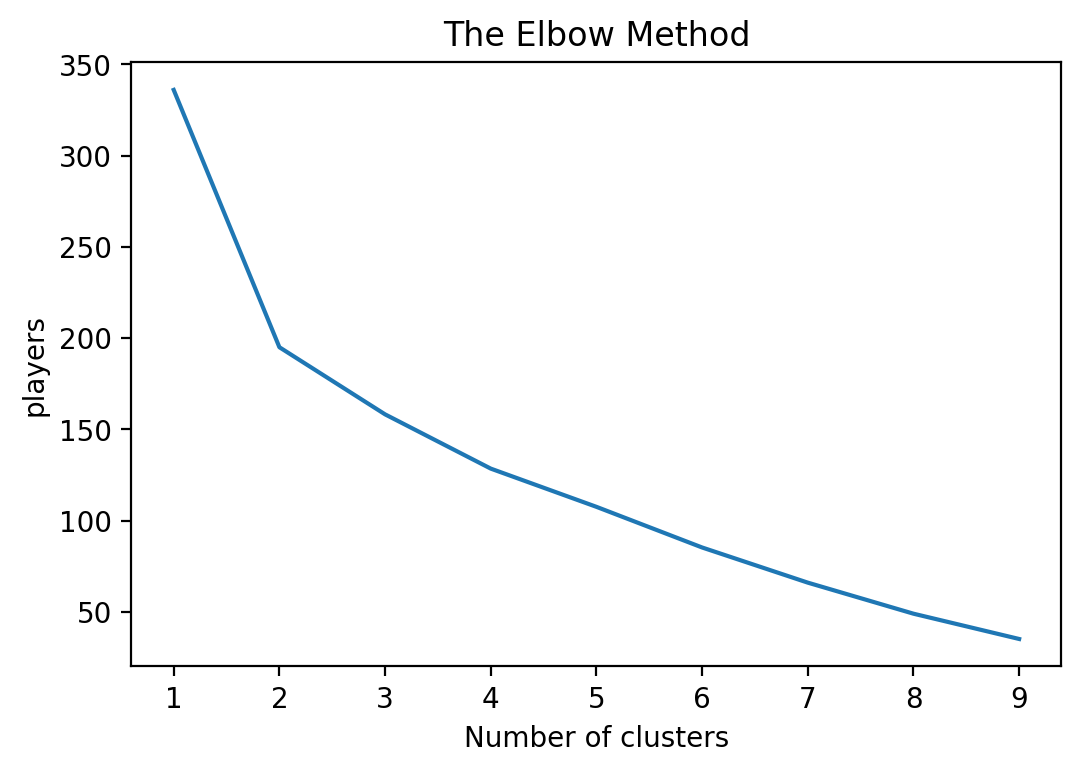

In [27]:
from sklearn.cluster import KMeans
players = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    players.append(kmeans.inertia_)
plt.plot(range(1, 10), players)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('players')
plt.show()

In [28]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)


In [29]:
y_kmeans

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 1, 2, 1])

In [30]:
kmeans.cluster_centers_

array([[ 0.75261781,  1.11551672,  0.43913766,  1.04575192,  0.97300988,
         0.68681554,  1.09023241,  0.2334512 ,  0.        ,  0.68313005,
         0.29012943,  1.04322407,  0.62609743, -0.65984566,  0.75261781,
        -0.73360415, -0.8674718 , -0.65094455, -0.90306168, -0.82983966,
        -0.56432587, -0.71777641, -0.45873872,  0.        , -0.2773501 ,
         0.54149748,  0.        ],
       [-0.02787473, -0.74062996, -0.20801257, -0.7285385 , -0.61408366,
        -0.34764712, -0.77898275,  0.2203722 ,  0.        , -0.45542003,
        -0.11605177, -0.74898139, -0.42796533,  0.31326006, -0.02787473,
         0.97813886,  1.03497011,  0.79198254,  1.01432716,  0.92881136,
         0.49363278,  0.42770474,  0.37788821,  0.        ,  0.36980013,
        -0.33322922,  0.        ],
       [-2.17422923, -1.1246603 , -0.69337525, -0.95164026, -1.07677864,
        -1.01750527, -0.93374896, -1.3614702 ,  0.        , -0.68313005,
        -0.52223297, -0.88272806, -0.59439629,  1.0397

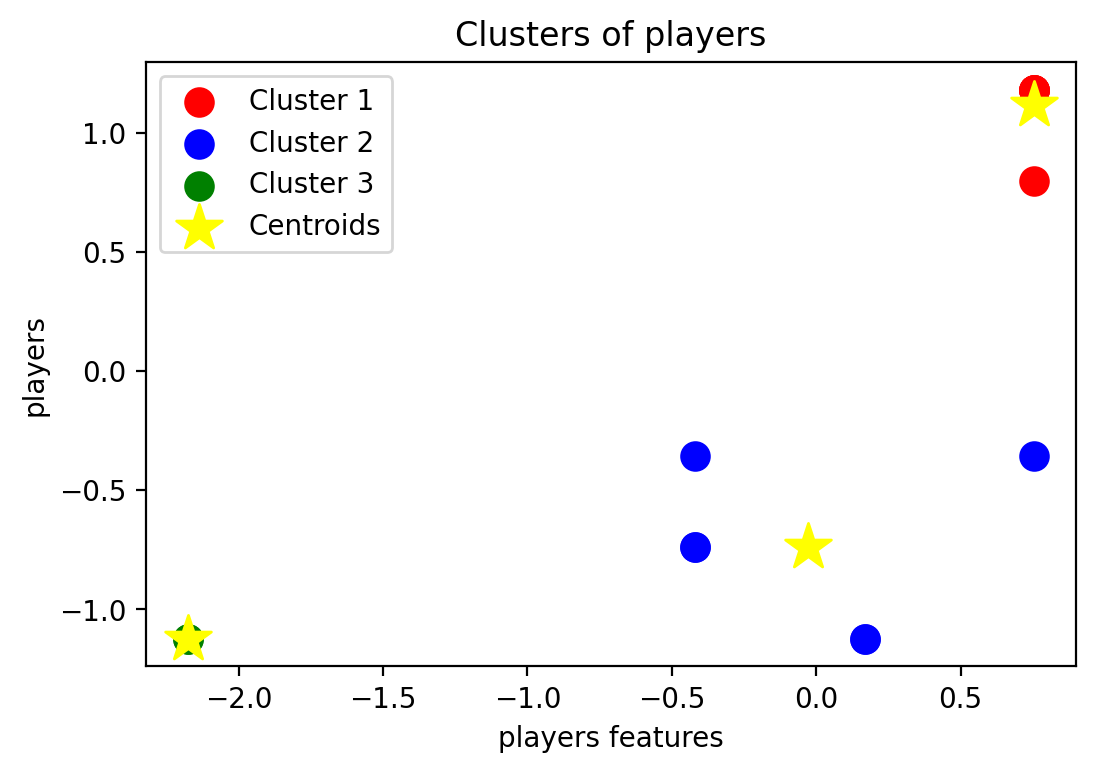

In [31]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300,marker='*', c = 'yellow', label = 'Centroids')
plt.title('Clusters of players')
plt.xlabel('players features')
plt.ylabel('players')
plt.legend()
plt.show()

In [32]:
Scotland_2021

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,RD Berrington (SCOT),6,6,1,184,97,36.80,232,79.31,0,...,49,1,1/23,49.00,4.08,72.0,0,0,1,0
1,DE Budge (SCOT),6,5,3,102,40*,51.00,134,76.11,0,...,19,0,-,-,3.80,-,0,0,5,0
2,KJ Coetzer (SCOT),6,6,0,195,81,32.50,280,69.64,0,...,-,-,-,-,-,-,-,-,0,0
3,MH Cross (SCOT),6,6,0,123,70,20.50,180,68.33,0,...,-,-,-,-,-,-,-,-,11,0
4,AC Evans (SCOT),5,-,-,-,-,-,-,-,-,...,145,11,5/43,13.18,4.18,18.9,0,1,1,0
5,Hamza Tahir (SCOT),5,-,-,-,-,-,-,-,-,...,156,5,3/36,31.20,4.58,40.8,0,0,0,0
6,MA Leask (SCOT),4,2,1,51,51*,51.00,35,145.71,0,...,60,5,3/19,12.00,3.15,22.8,0,0,0,0
7,CS MacLeod (SCOT),6,6,0,115,45,19.16,240,47.91,0,...,9,1,1/4,9.00,1.80,30.0,0,0,2,0
8,GT Main (SCOT),4,1,1,13,13*,-,11,118.18,0,...,137,7,3/33,19.57,4.41,26.5,0,0,2,0
9,HG Munsey (SCOT),6,6,3,230,79*,76.66,281,81.85,0,...,-,-,-,-,-,-,-,-,1,0


In [33]:
Scotland_2021["cluster"] = y_kmeans

In [34]:
Scotland_2021

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,RD Berrington (SCOT),6,6,1,184,97,36.80,232,79.31,0,...,1,1/23,49.00,4.08,72.0,0,0,1,0,0
1,DE Budge (SCOT),6,5,3,102,40*,51.00,134,76.11,0,...,0,-,-,3.80,-,0,0,5,0,0
2,KJ Coetzer (SCOT),6,6,0,195,81,32.50,280,69.64,0,...,-,-,-,-,-,-,-,0,0,0
3,MH Cross (SCOT),6,6,0,123,70,20.50,180,68.33,0,...,-,-,-,-,-,-,-,11,0,0
4,AC Evans (SCOT),5,-,-,-,-,-,-,-,-,...,11,5/43,13.18,4.18,18.9,0,1,1,0,1
5,Hamza Tahir (SCOT),5,-,-,-,-,-,-,-,-,...,5,3/36,31.20,4.58,40.8,0,0,0,0,1
6,MA Leask (SCOT),4,2,1,51,51*,51.00,35,145.71,0,...,5,3/19,12.00,3.15,22.8,0,0,0,0,1
7,CS MacLeod (SCOT),6,6,0,115,45,19.16,240,47.91,0,...,1,1/4,9.00,1.80,30.0,0,0,2,0,0
8,GT Main (SCOT),4,1,1,13,13*,-,11,118.18,0,...,7,3/33,19.57,4.41,26.5,0,0,2,0,1
9,HG Munsey (SCOT),6,6,3,230,79*,76.66,281,81.85,0,...,-,-,-,-,-,-,-,1,0,0


In [35]:
Scotland_2021['cluster'].value_counts()

0    6
1    6
2    2
Name: cluster, dtype: int64

In [36]:
Scotland_Cluster_2021 = np.array([6,6,2])

In [37]:
Scotland_Cluster_2021

array([6, 6, 2])

In [38]:
%store Scotland_Cluster_2021

Stored 'Scotland_Cluster_2021' (ndarray)


In [39]:
Scotland_2021_players_scaled.insert(0, 'Player', Scotland_2021.Player)

In [40]:
Scotland_2021_players_scaled

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,RD Berrington (SCOT),0.752618,1.179522,0.277350,1.371986,1.818796,0.572868,1.157849,0.432124,0.0,...,-0.650945,-0.341559,-0.616670,1.698072,0.291338,1.571312,0.0,-0.277350,-0.274914,0.0
1,DE Budge (SCOT),0.752618,0.795491,2.218801,0.336457,0.117273,1.186544,0.274329,0.359756,0.0,...,-0.650945,-0.807322,-0.936425,-1.120339,0.176790,-1.086209,0.0,-0.277350,1.124649,0.0
2,KJ Coetzer (SCOT),0.752618,1.179522,-0.693375,1.510898,1.341176,0.387036,1.590593,0.213437,0.0,...,-0.650945,-1.102305,-0.936425,-1.120339,-1.377792,-1.086209,0.0,-0.277350,-0.624805,0.0
3,MH Cross (SCOT),0.752618,1.179522,-0.693375,0.601653,1.012812,-0.131564,0.689042,0.183811,0.0,...,-0.650945,-1.102305,-0.936425,-1.120339,-1.377792,-1.086209,0.0,-0.277350,3.223993,0.0
4,AC Evans (SCOT),0.167248,-1.124660,-0.693375,-0.951640,-1.076779,-1.017505,-0.933749,-1.361470,0.0,...,0.260378,1.148881,2.580877,-0.362244,0.332248,-0.388610,0.0,3.605551,-0.274914,0.0
5,Hamza Tahir (SCOT),0.167248,-1.124660,-0.693375,-0.951640,-1.076779,-1.017505,-0.933749,-1.361470,0.0,...,-0.195283,1.319660,0.662349,0.674241,0.495888,0.419720,0.0,-0.277350,-0.624805,0.0
6,MA Leask (SCOT),-0.418121,-0.356600,0.277350,-0.307592,0.445637,1.186544,-0.618206,1.933758,0.0,...,0.716039,-0.170780,0.662349,-0.430116,-0.089125,-0.244661,0.0,-0.277350,-0.624805,0.0
7,CS MacLeod (SCOT),0.752618,1.179522,-0.693375,0.500626,0.266529,-0.189474,1.229973,-0.277987,0.0,...,-0.650945,-0.962576,-0.616670,-0.602672,-0.641411,0.021091,0.0,-0.277350,0.074977,0.0
8,GT Main (SCOT),-0.418121,-0.740630,0.277350,-0.787471,-0.688712,-1.017505,-0.834578,1.311168,0.0,...,1.171700,1.024677,1.301859,0.005300,0.426341,-0.108094,0.0,-0.277350,0.074977,0.0
9,HG Munsey (SCOT),0.752618,1.179522,2.218801,1.952892,1.281473,2.295483,1.599609,0.489566,0.0,...,-0.650945,-1.102305,-0.936425,-1.120339,-1.377792,-1.086209,0.0,-0.277350,-0.274914,0.0


In [41]:
Scotland_2021_players_scaled[['Player','Ave_x','Ave_y']]

,Player,Ave_x,Ave_y
0,RD Berrington (SCOT),0.572868,1.698072
1,DE Budge (SCOT),1.186544,-1.120339
2,KJ Coetzer (SCOT),0.387036,-1.120339
3,MH Cross (SCOT),-0.131564,-1.120339
4,AC Evans (SCOT),-1.017505,-0.362244
5,Hamza Tahir (SCOT),-1.017505,0.674241
6,MA Leask (SCOT),1.186544,-0.430116
7,CS MacLeod (SCOT),-0.189474,-0.602672
8,GT Main (SCOT),-1.017505,0.005300
9,HG Munsey (SCOT),2.295483,-1.120339


In [42]:
Scotland_2021_Ave=Scotland_2021_players_scaled.mean()

In [43]:
Scotland_2021_Ave

Mat_x          -7.930164e-18
Inns_x          1.110223e-16
NO             -2.379049e-17
Runs_x         -5.551115e-17
HS              1.506731e-16
Ave_x          -5.749369e-17
BF              1.030921e-16
SR_x           -5.551115e-17
100             0.000000e+00
50             -4.758099e-17
0               1.586033e-17
4s              7.930164e-18
6s             -3.172066e-17
Unnamed: 0_y   -1.586033e-17
Mat_y          -7.930164e-18
Inns_y         -4.758099e-17
Overs          -1.903239e-16
Mdns           -6.344132e-17
Runs_y          3.172066e-17
Wkts            4.609408e-17
Ave_y           1.427430e-16
Econ           -4.956353e-18
SR_y            3.172066e-17
4               0.000000e+00
5              -3.172066e-17
Ct             -3.965082e-18
St              0.000000e+00
dtype: float64

In [44]:
Scotland_Ave_2021 =Scotland_2021_Ave[['Ave_x','Ave_y']]

In [45]:
Scotland_Ave_2021

Ave_x   -5.749369e-17
Ave_y    1.427430e-16
dtype: float64

In [46]:
Scotland_Ave_2021 = np.array([Scotland_Ave_2021.Ave_x, Scotland_Ave_2021.Ave_y])

In [47]:
Scotland_Ave_2021

array([-5.74936923e-17,  1.42742960e-16])

In [48]:
%store Scotland_Ave_2021

Stored 'Scotland_Ave_2021' (ndarray)


In [49]:
Scotland_2021

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,RD Berrington (SCOT),6,6,1,184,97,36.80,232,79.31,0,...,1,1/23,49.00,4.08,72.0,0,0,1,0,0
1,DE Budge (SCOT),6,5,3,102,40*,51.00,134,76.11,0,...,0,-,-,3.80,-,0,0,5,0,0
2,KJ Coetzer (SCOT),6,6,0,195,81,32.50,280,69.64,0,...,-,-,-,-,-,-,-,0,0,0
3,MH Cross (SCOT),6,6,0,123,70,20.50,180,68.33,0,...,-,-,-,-,-,-,-,11,0,0
4,AC Evans (SCOT),5,-,-,-,-,-,-,-,-,...,11,5/43,13.18,4.18,18.9,0,1,1,0,1
5,Hamza Tahir (SCOT),5,-,-,-,-,-,-,-,-,...,5,3/36,31.20,4.58,40.8,0,0,0,0,1
6,MA Leask (SCOT),4,2,1,51,51*,51.00,35,145.71,0,...,5,3/19,12.00,3.15,22.8,0,0,0,0,1
7,CS MacLeod (SCOT),6,6,0,115,45,19.16,240,47.91,0,...,1,1/4,9.00,1.80,30.0,0,0,2,0,0
8,GT Main (SCOT),4,1,1,13,13*,-,11,118.18,0,...,7,3/33,19.57,4.41,26.5,0,0,2,0,1
9,HG Munsey (SCOT),6,6,3,230,79*,76.66,281,81.85,0,...,-,-,-,-,-,-,-,1,0,0
